# Introduction to machine learning & the supercompressible metamaterial example (3D)

M.A. Bessa (m.a.bessa@tudelft.nl)\
September 30, 2020

**What:** 30min introduction to Machine Learning

**How:** Jointly workout this notebook
* GitHub: https://github.com/bessagroup/f3dasm
    1. You can do this locally in your computer (but you have to have the Python packages installed):
        * clone the repository to your computer: git clone https://github.com/bessagroup/f3dasm
        * load jupyter notebook (it will open in your internet browser): jupyter notebook
        * search for this notebook in your computer (f3dasm/examples/supercompressible/machine_learning) and open it
    2. Or you can use Google's Colab (no installation required, but times out if idle):
        * go to https://colab.research.google.com
        * login
        * File > Open notebook
        * click on Github (no need to login or authorize anything)
        * paste the git link: https://github.com/bessagroup/f3dasm
        * click search and then click on the notebook (f3dasm/examples/supercompressible/machine_learning).


This simple tutorial is based on a script I created for this article: https://imechanica.org/node/23957

It follows from some examples provided by the scikit-learn user guide, which seem to have originated from Mathieu Blondel, Jake Vanderplas, Vincent Dubourg, and Jan Hendrik Metzen.

License: BSD 3 clause

**Let's start by importing basic modules into Python**

## Outline for today

1. Basic steps in machine learning (supervised learning)
2. Our first machine learning model: Gaussian Process regression
3. Is machine learning necessary? Simple example with noisy dataset
4. Replicating the classification plots of the supercompressible metamaterial

## Basic steps in supervised learning

Today we'll cover 4 basic steps in machine learning (supervised learning)

1. Get to know your dataset
2. Pre-process your data (split dataset into **training** and **testing** set)
3. Choose your machine learning method and fit it to the training set.
4. Predict the accuracy of the machine learning model on the testing set.

We will start with a very simple example: regression in 1D

### 1. First look at your dataset

- Here we will create an "artificial" dataset with 50 points from the function $x\sin(x)$ in the domain $x\in[0,10]$.
- In general, we wouldn't know the underlying function (of course!)

In [1]:
import numpy as np # fundamental scientific computing module
import matplotlib.pyplot as plt # plotting module
import pandas as pd # Pandas dataframe (very common in ML to handle datasets)

# Function to "learn"
def f(x):
    return x * np.sin(x)

n_artificial_data = 50 # number of points in our dataset
x_artificial_data = np.linspace(0, 10, n_artificial_data) # uniformly spaced points
y_artificial_data = f(x_artificial_data) # function values at x_data

#
# Create a dictionary with the names of the input and output variables
# and their respective values:
input_dictionary = {
            'x' : x_artificial_data,
            'y' : y_artificial_data
            }
#
# Then, we create a Pandas data frame:
data = pd.DataFrame(input_dictionary)

So, "data" is our dataset (a Pandas dataframe), just like what F3DASM outputs when it finishes running.

- Given a dataset, before doing anything else make sure you understand the data and its structure (inputs, outputs, names of variables, etc.)

In [2]:
print(data)

            x         y
0    0.000000  0.000000
1    0.204082  0.041361
2    0.408163  0.162010
3    0.612245  0.351861
4    0.816327  0.594804
5    1.020408  0.869716
6    1.224490  1.151795
7    1.428571  1.414147
8    1.632653  1.629531
9    1.836735  1.772167
10   2.040816  1.819509
11   2.244898  1.753867
12   2.448980  1.563797
13   2.653061  1.245160
14   2.857143  0.801798
15   3.061224  0.245760
16   3.265306 -0.402933
17   3.469388 -1.116991
18   3.673469 -1.863006
19   3.877551 -2.602991
20   4.081633 -3.296252
21   4.285714 -3.901487
22   4.489796 -4.379025
23   4.693878 -4.693073
24   4.897959 -4.813867
25   5.102041 -4.719599
26   5.306122 -4.398021
27   5.510204 -3.847623
28   5.714286 -3.078316
29   5.918367 -2.111551
30   6.122449 -0.979868
31   6.326531  0.274140
32   6.530612  1.599413
33   6.734694  2.938505
34   6.938776  4.230066
35   7.142857  5.411632
36   7.346939  6.422579
37   7.551020  7.207126
38   7.755102  7.717221
39   7.959184  7.915180
40   8.163265  7

In this dataset "x" are the inputs (features) and "y" are the outputs (targets).

- Save input points (features) in a variable called X_data

- Save output points (targets) in a variable called Y_data 

In [3]:
x_data = data.loc[:,'x'].values # note that we ask for the
                                # values, not a subset of the
                                # DataFrame

y_data = data.loc[:,'y'].values

print(x_data)
print(y_data)

[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]
[ 0.          0.0413608   0.16200986  0.35186084  0.5948039   0.86971589
  1.15179525  1.41414725  1.62953058  1.77216669  1.81950863  1.75386699
  1.5637967   1.2451602   0.80179828  0.24576023 -0.40293269 -1.1169913
 -1.86300628 -2.60299144 -3.2962518  -3.9014869  -4.37902496 -4.69307334
 -4.81386712 -4.71959884 -4.39802064 -3.8476234  -3.07831593 -2.11155061
 -0.97986787  0.27413954  

A short note:

- In most machine learning packages the inputs and outputs should be 2D arrays (even if the variables are 1D vectors, like in this case).

In [4]:
X_data = np.reshape(x_data, (-1, 1)) # convert vector to 2d array (ML packages use input variables as 2d arrays)

Y_data = np.reshape(y_data, (-1, 1)) # convert vector to 2d array (ML packages use input variables as 2d arrays)

print(X_data)
print(Y_data)

[[ 0.        ]
 [ 0.20408163]
 [ 0.40816327]
 [ 0.6122449 ]
 [ 0.81632653]
 [ 1.02040816]
 [ 1.2244898 ]
 [ 1.42857143]
 [ 1.63265306]
 [ 1.83673469]
 [ 2.04081633]
 [ 2.24489796]
 [ 2.44897959]
 [ 2.65306122]
 [ 2.85714286]
 [ 3.06122449]
 [ 3.26530612]
 [ 3.46938776]
 [ 3.67346939]
 [ 3.87755102]
 [ 4.08163265]
 [ 4.28571429]
 [ 4.48979592]
 [ 4.69387755]
 [ 4.89795918]
 [ 5.10204082]
 [ 5.30612245]
 [ 5.51020408]
 [ 5.71428571]
 [ 5.91836735]
 [ 6.12244898]
 [ 6.32653061]
 [ 6.53061224]
 [ 6.73469388]
 [ 6.93877551]
 [ 7.14285714]
 [ 7.34693878]
 [ 7.55102041]
 [ 7.75510204]
 [ 7.95918367]
 [ 8.16326531]
 [ 8.36734694]
 [ 8.57142857]
 [ 8.7755102 ]
 [ 8.97959184]
 [ 9.18367347]
 [ 9.3877551 ]
 [ 9.59183673]
 [ 9.79591837]
 [10.        ]]
[[ 0.        ]
 [ 0.0413608 ]
 [ 0.16200986]
 [ 0.35186084]
 [ 0.5948039 ]
 [ 0.86971589]
 [ 1.15179525]
 [ 1.41414725]
 [ 1.62953058]
 [ 1.77216669]
 [ 1.81950863]
 [ 1.75386699]
 [ 1.5637967 ]
 [ 1.2451602 ]
 [ 0.80179828]
 [ 0.24576023]
 [-0.4029

### 2. Pre-process your data

Prior to any learning task, datasets should be pre-processed (scaling, cleaning, etc.).

- Here, we will only do one thing: spliting the data into training and testing data.

A powerful and very popular machine learning package for this is **scikit-learn**.

In [5]:
from sklearn.model_selection import train_test_split

seed = 1987 # set a random seed so that everyone gets the same result
np.random.seed(seed)

testset_ratio = 0.90 # ratio of test set points from the dataset

# Let's split into 10% training points and the rest for testing:
X_train, X_test, Y_train, Y_test = train_test_split(X_data,
                                    Y_data, test_size=testset_ratio,
                                    random_state=seed)

#x_train = X_train.ravel() # just for plotting later
#x_test = X_test.ravel() # just for plotting later

Let's plot the **training** and **testing** points, as well as the underlying function that originated them (usually we don't know the underlying function!)

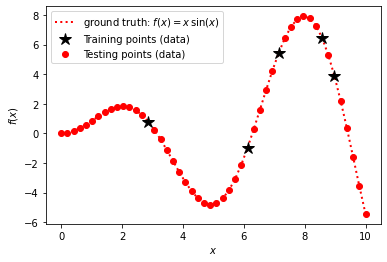

In [6]:
fig1, ax1 = plt.subplots() # This opens a new figure

# Plot points and interpolate them:
ax1.plot(X_data, y_data, 'r:', markersize=6, linewidth=2,
         label=u'ground truth: $f(x) = x\,\sin(x)$')

ax1.plot(X_train, Y_train, 'k*', markersize=12,
         label="Training points (data)") # Markers locating training points

ax1.plot(X_test, Y_test, 'ro', markersize=6,
         label="Testing points (data)") # Markers locating training points

ax1.set_xlabel('$x$') # label of the x axis
ax1.set_ylabel('$f(x)$') # label of the y axis
ax1.legend(loc='upper left') # plot legend in the upper left corner

This concludes (a really simple!) dataset pre-processing.

### 3. Choose machine learning model and fit to training set

Suppose that our choice of "machine learning" model is just a simple "polynomial approximation"

- Fitting a polynomial with scikit-learn is trivial!

In [7]:
# We start by importing the polynomial predictor from scikit-learn
from sklearn.preprocessing import PolynomialFeatures # For Polynomial fit
from sklearn.linear_model import LinearRegression # For Least Squares
from sklearn.pipeline import make_pipeline # to link different objects

degree = 4 # degree of polynomial we want to fit

# Create polynomial model:
poly_model = make_pipeline(PolynomialFeatures(degree),
                           LinearRegression())

# Fit polynomial model to your training data:
poly_model.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

Done.

- We have a "machine learning" model that fits our training data.
- Now, let's use our model to predict the testing points (**unseen** by the algorithm)

In [8]:
Y_test_pred = poly_model.predict(X_test) # prediction of our polynomial
                                         # for unseen points (test data)

print(Y_test_pred)

[[  7.4638769 ]
 [ -9.08528892]
 [  4.34715805]
 [  7.19334367]
 [  8.94873756]
 [ -9.62377113]
 [102.17347985]
 [ 34.52060487]
 [ -0.3821815 ]
 [  3.14356991]
 [  5.35789995]
 [ -8.44349294]
 [ -6.47170116]
 [ -2.41401827]
 [ -3.18592231]
 [ -6.40662071]
 [ -2.28101127]
 [  1.96124182]
 [  7.58816034]
 [  6.30595348]
 [134.25010457]
 [  6.99986332]
 [ 14.10832475]
 [ -8.12324068]
 [-10.26046222]
 [ 63.40068072]
 [  1.83268039]
 [ -3.82045333]
 [  4.52926771]
 [117.55147052]
 [ 26.84420058]
 [ -5.16347796]
 [ 88.05947563]
 [  0.44707913]
 [ 75.15357731]
 [ -9.1603977 ]
 [ -4.76572513]
 [ -9.62773456]
 [ -9.79325996]
 [ -6.69813111]
 [ 43.13735778]
 [  7.66928638]
 [ -7.51263376]
 [ 20.05692254]
 [ 52.74645803]]


Let's plot the polynomial prediction on top of fig1.

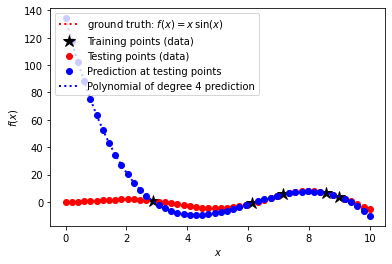

In [9]:
# Plot x_data and prediction as a blue line:
ax1.plot(X_test, Y_test_pred, 'bo', linewidth=2,
         label="Prediction at testing points")

ax1.plot(X_data, poly_model.predict(X_data), 'b:', linewidth=2,
         label="Polynomial of degree %d prediction" % degree)

# Replot figure and legend:
ax1.legend(loc='upper left')
fig1

Nice.

Yet, our polynomial (blue) is clearly different of the function we want to "learn", i.e. $x \sin(x)$.

How do we evaluate the quality of our approximation?

### 4. Evaluate model performance

* By evaluating the error of our polynomial model in the points that we didn't use in the fit (testing points).

Two common metrics are $R^2$ and $MSE$

In [10]:
# Import error metrics:
from sklearn.metrics import mean_squared_error, r2_score

# Compute MSE and R2 for the polynomial model we fitted
mse_value_poly = mean_squared_error(Y_test, Y_test_pred)
r2_value_poly = r2_score(Y_test, Y_test_pred)

print('MSE for polynomial = ', mse_value_poly)
print('R2 score for polynomial = ', r2_value_poly)

MSE for polynomial =  1475.2512354056641
R2 score for polynomial =  -106.00766052054072


As expected, these predictions are not great because:

* We want $MSE$ to be as low as possible

* The closer $R^2$ is to 1.0 the better

## Our first machine learning model

Polynomial models can hardly be considered "machine learning"...

Instead, let's use a machine learning method called Gaussian Processes -- a powerful method for small datasets (<10k points)

In [11]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ExpSineSquared, ConstantKernel

# Define the kernel function
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) # This is the standard RBF kernel
#kernel = 1.0 * RBF(10, (1e-2, 1e2)) # Same kernel as above
                                    #(scikit-learn assumes constant
                                    # variance if you just write RBF
                                    # without the constant kernel or
                                    # without multiplying by 1.0)

# Other examples of kernels:
#kernel = ExpSineSquared(length_scale=3.0, periodicity=3.14,
#                       length_scale_bounds=(0.1, 10.0),
#                       periodicity_bounds=(0.1, 10)) * RBF(3.0, (1e-2, 1e2))
#kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-2, 1e2),nu=1.5)
                
gp_model = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, n_restarts_optimizer=20) # using a small alpha

# Fit to data using Maximum Likelihood Estimation of the parameters
gp_model.fit(X_train, Y_train)

# Make the prediction on the entire dataset (for plotting)
Y_data_pred, sigma_data_pred = gp_model.predict(X_data, return_std=True) # also output the uncertainty (standard deviation)

SIGMA_data_pred = np.reshape(sigma_data_pred, (-1, 1)) # convert this 1D array into a 2D array for consistency

# Predict for test set (for error metric)
Y_test_pred, sigma_test_pred = gp_model.predict(X_test, return_std=True) # also output the uncertainty (standard deviation)

SIGMA_test_pred = np.reshape(sigma_test_pred, (-1, 1)) # convert this 1D array into a 2D array for consistency

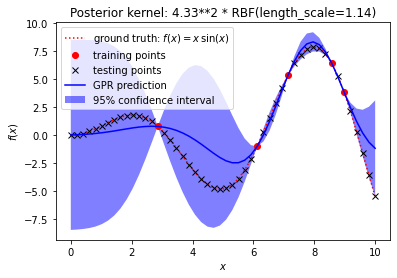

In [12]:
# Plot the function, the prediction and the 95% confidence interval based on the MSE
fig2, ax2 = plt.subplots() # This opens a new figure

ax2.plot(X_data, Y_data, 'r:', label=u'ground truth: $f(x) = x\,\sin(x)$') # function to learn

ax2.plot(X_train, Y_train, 'ro', markersize=6, label="training points") # noiseless data

ax2.plot(X_test, Y_test, 'kx', markersize=6, label="testing points") # Plot test points

ax2.plot(X_data, Y_data_pred, 'b-', label="GPR prediction")
ax2.fill(np.concatenate([X_data, X_data[::-1]]),
         np.concatenate([Y_data_pred - 1.9600 * SIGMA_data_pred,
                        (Y_data_pred + 1.9600 * SIGMA_data_pred)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$f(x)$')
ax2.set_title("Posterior kernel: %s"
              % gp_model.kernel_, fontsize=12) # Show in the title the value of the hyperparameters
ax2.legend(loc='upper left')

This looks like a much better prediction than what we obtained with the polynomial fit! In addition, also note that we predict the 95\% confidence interval for our predictions!

- Let's use the regression metrics $R^2$ and $MSE$ to compare the two models (polynomial regression vs GPR)

In [13]:
# Compute MSE and R2 for the GP model we just fitted:
mse_value_gp = mean_squared_error(Y_test, Y_test_pred)
r2_value_gp = r2_score(Y_test, Y_test_pred)

print('MSE for GP = ', mse_value_gp)
print('R2 score for GP = ', r2_value_gp)


# Printing the previously obtained metrics for the polynomial fit:
print('MSE for polynomial = ', mse_value_poly)
print('R2 score for polynomial = ', r2_value_poly)

MSE for GP =  2.5303916826315183
R2 score for GP =  0.8164575038741949
MSE for polynomial =  1475.2512354056641
R2 score for polynomial =  -106.00766052054072


The Gaussian Process model is much better!

## Classification plots for the supercompressible metamaterial (3D)

The beautiful thing about modern machine learning packages, is that they are as easy to use for large dimensional datasets as they are for the 1D example that we just covered.

- Let's consider the 3D dataset obtained by F3DASM for the supercompressible metamaterial

In [14]:
# standard library
import pickle
import itertools

# third-party
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

binary_metrics = ((accuracy_score, 'Accuracy score'),
                  (f1_score, 'F1 score'),
                  (precision_score, 'Precision score'),
                  (recall_score, 'Recall score'))

colors = ['r', 'g', 'b']

Let's import a dataset (previously obtained with F3DASM)

In [15]:
# get pandas frame
filename = 'DoE_results.pkl'
with open(filename, 'rb') as file:
    data = pickle.load(file)
    
# define number of points to start with
N = 1000

points = data['points'].loc[:(N-1)]
print('variables:', [col for col in points.columns])

# get number of inputs
n_inputs = len(points.columns) - 3

# get X data
X_data = points.iloc[:,range(n_inputs)].values.copy()

# get y data
var_name = 'coilable'
y_data = points.loc[:, var_name].values.copy()

Y_data = np.reshape(y_data, (-1, 1)) # convert vector to 2d array (ML packages use input variables as 2d arrays)

print(X_data)
print(Y_data)

print('X:', X_data)
print('X shape:', np.shape(X_data))
print('Y:', Y_data)
print('Y shape:', np.shape(Y_data))

variables: ['ratio_d', 'ratio_pitch', 'ratio_top_diameter', 'coilable', 'sigma_crit', 'energy']
[[0.004      0.25       0.        ]
 [0.0385     0.875      0.4       ]
 [0.05575    0.5625     0.2       ]
 ...
 [0.06659863 1.07397461 0.26484375]
 [0.04934863 0.76147461 0.46484375]
 [0.01484863 1.38647461 0.06484375]]
[[1.]
 [0.]
 [2.]
 [0.]
 [1.]
 [0.]
 [2.]
 [1.]
 [0.]
 [0.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [0.]
 [1.]
 [0.]
 [2.]
 [0.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [2.]
 [2.]
 [0.]
 [2.]
 [0.]
 [2.]
 [0.]
 [1.]
 [0.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [2.]
 [2.]
 [0.]
 [0.]
 [0.]
 [2.]
 [1.]
 [1.]
 [0.]
 [2.]
 [0.]
 [2.]
 [0.]
 [2.]
 [1.]
 [1.]
 [0.]
 [2.]
 [0.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [0.]
 [2.]
 [1.]
 [2.]
 [0.]
 [2.]
 [0.]
 [1.]
 [2.]
 [2.]
 [0.]
 [1.]
 [2.]
 [2.]
 [1.]
 [1.]
 [2.]
 [0.]
 [0.]
 [2.]
 [0.]
 [2.]
 [0.]
 [1.]
 [0.]
 [2.]
 [2.]
 [0.]
 [2.]
 [2.]
 [0.]
 [1.]
 [0.]
 [2.]
 [0.]
 [1.]
 [2.]
 [2.]
 [0.]
 [2.]
 [0.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [0.]
 [1.]
 [0.

Since it is a classification problem, let's see how balanced the classes are.

In [16]:
testset_ratio = 0.20 # ratio of test set points from the dataset

# Let's split into 80% training points and the rest for testing:
X_train, X_test, Y_train, Y_test = train_test_split(X_data,
                                    Y_data, test_size=testset_ratio,
                                    random_state=seed)

Scale data and fit it

In [17]:
# scale data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train
clf = SVC(kernel='rbf').fit(X_train_scaled, Y_train)

/home/mabessa/anaconda2/envs/MLenv3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluate model with accuracy metric

In [18]:
def evaluate_model(clf, train_data, test_data, metrics=((accuracy_score, 'Accuracy classification score'),), print_results=True):
    
    # make predictions
    y_train_predicted = clf.predict(train_data[0])
    y_test_predicted = clf.predict(test_data[0])
    
    metric_results = []
    for Imetric in range(np.shape(metrics)[0]):
        metric = metrics[Imetric][0] # select metric used
        metric_results.append([metric(train_data[1], y_train_predicted), metric(test_data[1], y_test_predicted)])
        
        if print_results:
            print("Train", metrics[Imetric][1],"for ML model:", metric_results[-1][0])
            print("Test", metrics[Imetric][1],"for ML model:", metric_results[-1][1])
        
    return metric_results

In [19]:
# evaluate model
evaluate_model(clf, (X_train_scaled, Y_train), (X_test_scaled, Y_test));

Train Accuracy classification score for ML model: 0.86375
Test Accuracy classification score for ML model: 0.83


Now, let's plot the result.

In [20]:
def make_clf_plot(scaler, clf, variables, x3, labels, feature_labels=('Not Coilable','Coilable', 'Coilable (but yields)')):

    column_names = [col for col in points.columns]

    indices =  [column_names.index(name) for name in variables]
    bounds = [data['doe_variables'][name] for name in variables]

    xx = np.meshgrid(np.arange(bounds[0][0], bounds[0][1], 0.005),
                          np.arange(bounds[1][0], bounds[1][1], 0.005))

    n = len(xx[0].ravel())
    xx.append(x3 * np.ones(n))

    XX = np.empty((n, 3))
    for index, xx_ in zip(indices, xx):
        XX[:, index] = xx_.ravel()

    XX_scaled = scaler.transform(XX)

    Y = clf.predict(XX_scaled)
    Y = Y.reshape(xx[0].shape)
    
    n_features = len(feature_labels)
    colors_ = colors[:n_features]
    custom_cm = ListedColormap(colors_)
    
    # plot
    fig, ax = plt.subplots()
    ax.contourf(xx[0], xx[1], Y, cmap=custom_cm, alpha=0.5)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_title('%s = %.3g' % (labels[2], x3))

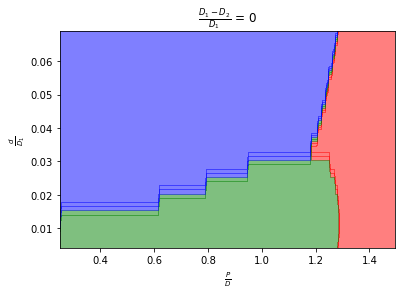

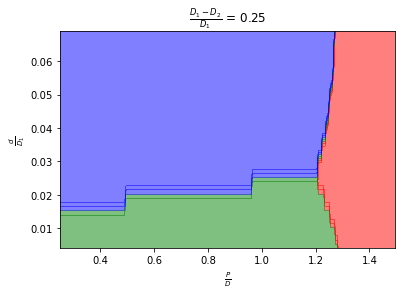

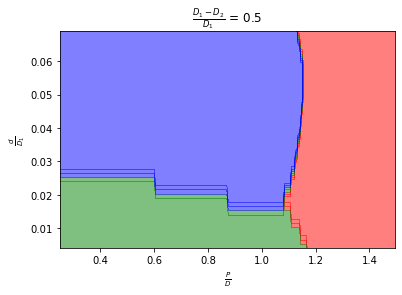

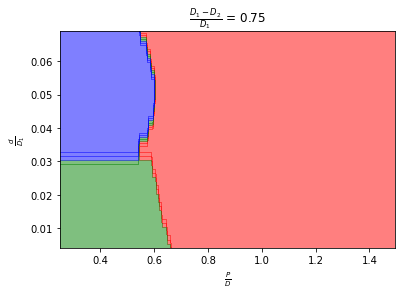

In [21]:
plot_variables = ['ratio_pitch', 'ratio_d', 'ratio_top_diameter']
plot_labels = ['$\\frac{P}{D}$', '$\\frac{d}{D_1}$', '$\\frac{D_1 - D_2}{D_1}$']
for x3 in [0., 0.25, 0.5, 0.75]:
    make_clf_plot(scaler, clf, plot_variables, x3, plot_labels)